#TODO
Carga entre -9 y 9
Punto isoelectrico
Mirar longitudes
CMAP colores para datos categoricos
Colores a los bigotes

In [1]:
!pip install pandas biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

filedb = '/content/drive/My Drive/PI 2.0/dfLimpio.csv'

In [4]:
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np

In [5]:
df = pd.read_csv(filedb)

print(df.shape)
# Conjunto de caracteres no válidos
invalid_characters = set("ZBJOUX")

# Función para verificar secuencias válidas
def is_valid_sequence(sequence):
    return not any(char in invalid_characters for char in sequence)

# Filtrar el DataFrame para eliminar filas con secuencias inválidas
df= df[df['Secuencia'].apply(is_valid_sequence)]

print("\nDataFrame filtrado:")
print(df.shape)

(39656, 9)

DataFrame filtrado:
(38174, 9)


In [20]:
#df = pd.read_csv(filedb)

# Diccionario para la polaridad de los aminoácidos
amino_acid_polarities = {
    'A': 0.0, 'C': 0.0, 'D': 1.0, 'E': 1.0, 'F': 0.0, 'G': 0.0,
    'H': 0.0, 'I': 0.0, 'K': 1.0, 'L': 0.0, 'M': 0.0, 'N': 1.0,
    'P': 0.0, 'Q': 1.0, 'R': 1.0, 'S': 1.0, 'T': 1.0, 'V': 0.0,
    'W': 0.0, 'Y': 1.0
}

def calculate_features(sequence):
    analysed_peptide = ProteinAnalysis(sequence)

    length = len(sequence)
    gravy = analysed_peptide.gravy()

    total_polarity = sum(amino_acid_polarities.get(aa, 0) for aa in sequence)
    polaridad = total_polarity / length if length > 0 else 0

    boman_index = analysed_peptide.secondary_structure_fraction()[1]  # Estimación aproximada

    isoelectric_point = analysed_peptide.isoelectric_point()
    charge = np.round(isoelectric_point / 7.0 - 1.0, 2)  # Aproximación simple

    return length, gravy, polaridad, boman_index, charge, isoelectric_point

# Calcular las características y convertir en DataFrame
features_df = df['Secuencia'].apply(lambda seq: pd.Series(calculate_features(seq), index=['Longitud', 'Hidrofobicidad', 'Polaridad', 'Índice de Boman', 'Carga', 'Punto Isoeléctrico']))

# Añadir la secuencia original como columna
dfCTDD = pd.concat([df['Secuencia'], features_df], axis=1)

print(dfCTDD.head())

                               Secuencia  Longitud  Hidrofobicidad  Polaridad  \
0             GIGAVLKVLTTGLPALISWIKRKRQQ      26.0        0.273077   0.384615   
1                GIGKFLHSAKKFGKAFVGEIMNS      23.0        0.082609   0.347826   
2                          ILPWKWPWWPWRR      13.0       -1.069231   0.230769   
3                      KWCFRVCYRGICYRRCR      17.0       -0.517647   0.470588   
4  LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES      37.0       -0.724324   0.567568   

   Índice de Boman  Carga  Punto Isoeléctrico  
0         0.192308   0.71           11.999968  
1         0.304348   0.43           10.001383  
2         0.230769   0.71           11.999968  
3         0.058824   0.42            9.930984  
4         0.216216   0.52           10.605259  


#Medidas de dispercion

In [21]:
# Seleccionar solo las columnas numéricas
numeric_columns = dfCTDD.select_dtypes(include='number')

# Calcular la desviación estándar para cada columna numérica
std_deviation = numeric_columns.std()

# Calcular la varianza para cada columna numérica
variance = numeric_columns.var()

# Calcular el rango para cada columna numérica (máximo - mínimo)
range_values = numeric_columns.max() - numeric_columns.min()

# Mostrar los resultados
print("Desviación Estándar:")
print(std_deviation)
print("\nVarianza:")
print(variance)
print("\nRango:")
print(range_values)

Desviación Estándar:
Longitud              9.089208
Hidrofobicidad        0.942613
Polaridad             0.142669
Índice de Boman       0.127128
Carga                 0.366271
Punto Isoeléctrico    2.567755
dtype: float64

Varianza:
Longitud              82.613708
Hidrofobicidad         0.888519
Polaridad              0.020355
Índice de Boman        0.016161
Carga                  0.134155
Punto Isoeléctrico     6.593364
dtype: float64

Rango:
Longitud              48.000000
Hidrofobicidad         8.700000
Polaridad              1.000000
Índice de Boman        1.000000
Carga                  1.130000
Punto Isoeléctrico     7.949939
dtype: float64


##Desviación estándar
La longitud de las secuencias tiene la mayor desviación estándar, lo que indica que las longitudes varían más en comparación con las otras propiedades que indican menos variabilidad, también es notable que la hidrofobicidad tiene una variabilidad notable pero no tan alta como la longitud.

##Varianza
La longitud tiene la mayor varianza, lo que confirma que hay una alta variabilidad en las longitudes. Las otras propiedades tienen una dispersión relativamente pequeña alrededor de su media.

##Rango
El rango indica la diferencia entre el valor máximo y mínimo en cada columna. La longitud tiene el rango más amplio, sugiriendo una gran variación en las longitudes de las secuencias. Las otras propiedades tienen rangos más pequeños, indicando menos variabilidad en esos atributos.

#Cuartiles y Percentiles

In [22]:
# Seleccionar solo las columnas numéricas
numeric_columns = dfCTDD.select_dtypes(include='number')

# Calcular cuartiles
quartiles = numeric_columns.quantile([0.25, 0.5, 0.75])

# Calcular percentiles (por ejemplo, percentiles 10, 50 y 90)
percentiles = numeric_columns.quantile([0.10, 0.50, 0.90])

# Mostrar los resultados
print("Cuartiles:")
print(quartiles)
print("\nPercentiles:")
print(percentiles)



Cuartiles:
      Longitud  Hidrofobicidad  Polaridad  Índice de Boman  Carga  \
0.25      14.0       -0.713333   0.333333         0.153846  -0.15   
0.50      20.0       -0.147368   0.428571         0.235294   0.27   
0.75      27.0        0.437500   0.517241         0.312500   0.48   

      Punto Isoeléctrico  
0.25            5.961126  
0.50            8.903745  
0.75           10.350818  

Percentiles:
     Longitud  Hidrofobicidad  Polaridad  Índice de Boman  Carga  \
0.1      11.0       -1.275000   0.238095         0.071429  -0.38   
0.5      20.0       -0.147368   0.428571         0.235294   0.27   
0.9      33.0        1.073684   0.600000         0.394737   0.68   

     Punto Isoeléctrico  
0.1            4.370259  
0.5            8.903745  
0.9           11.763691  


##Cuartiles
Todas las variables tienen una distribución simétrica a excepción de *Hidrofobicidad* que tiene una distribución sesgada a izquierda y *carga* con una distribución sesgada a derecha.

#Diagrama de bigotes

<ipython-input-26-bdfe23d59b59>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)


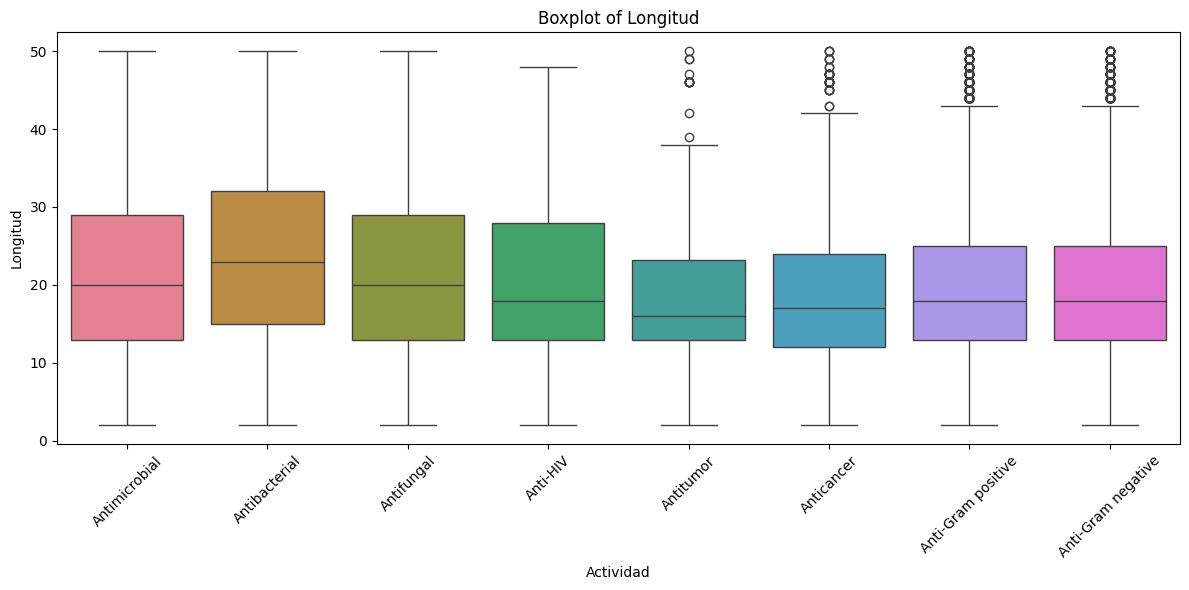

<ipython-input-26-bdfe23d59b59>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)


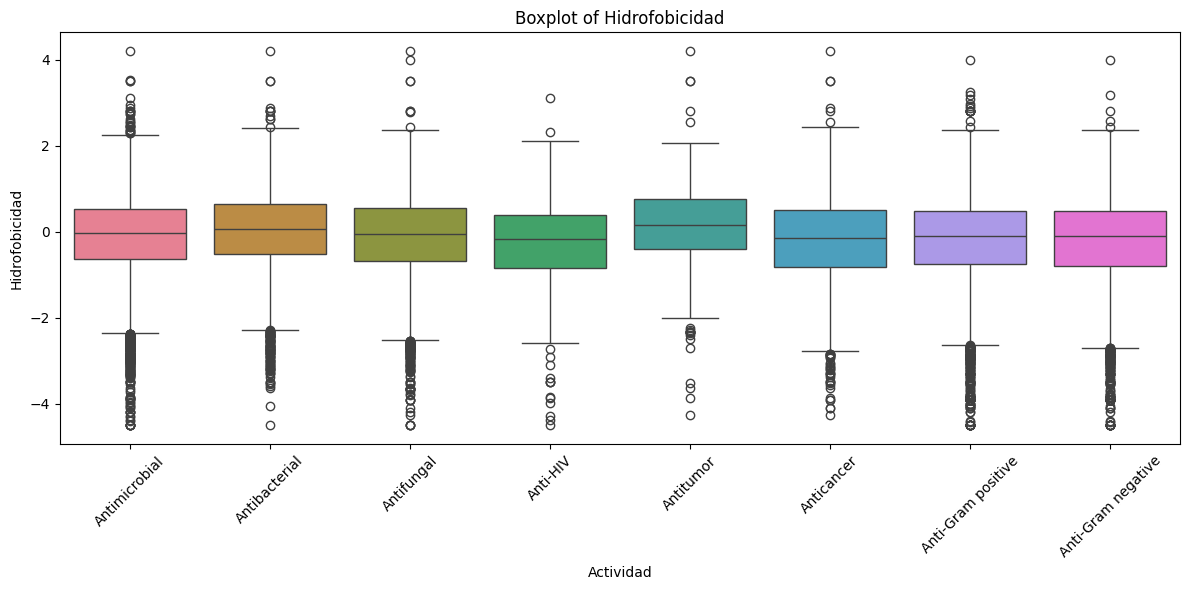

<ipython-input-26-bdfe23d59b59>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)


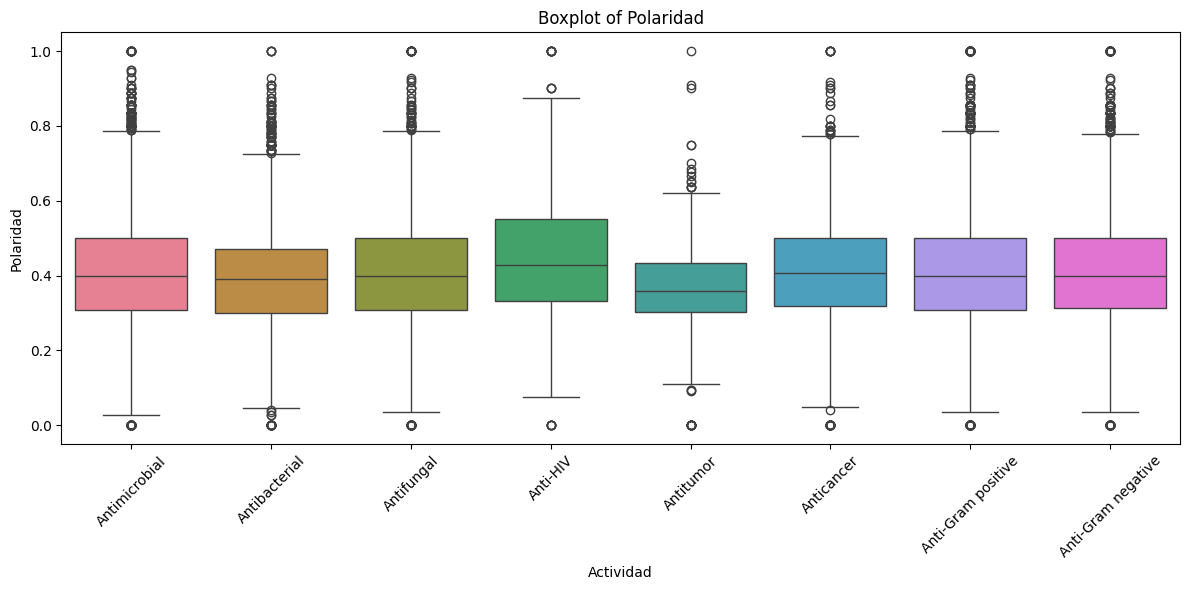

<ipython-input-26-bdfe23d59b59>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)


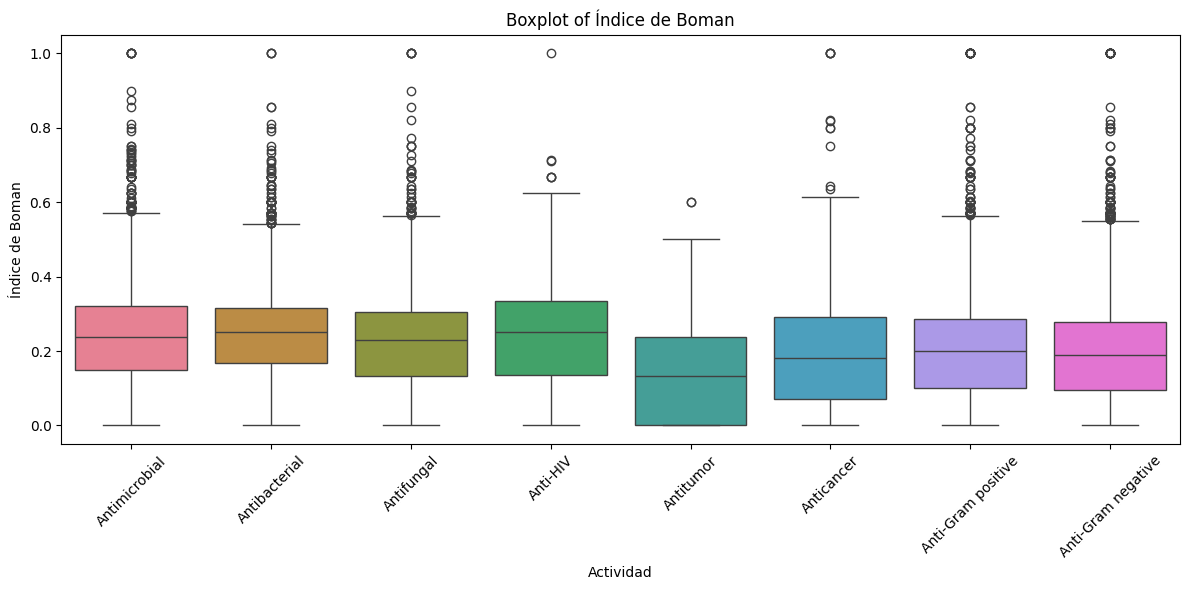

<ipython-input-26-bdfe23d59b59>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)


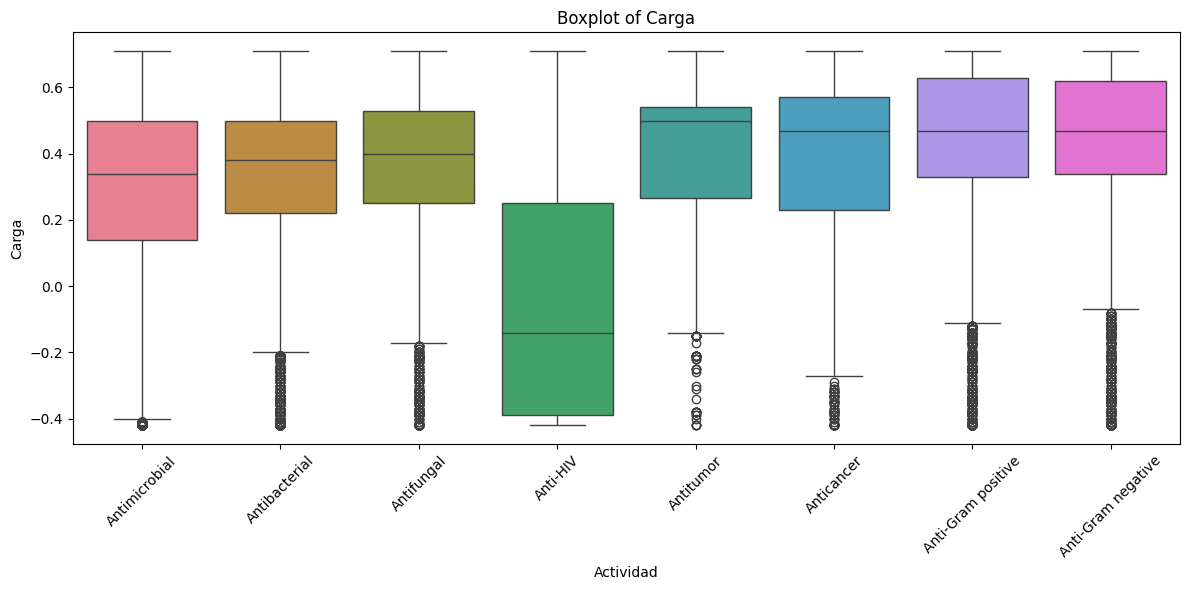

<ipython-input-26-bdfe23d59b59>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)


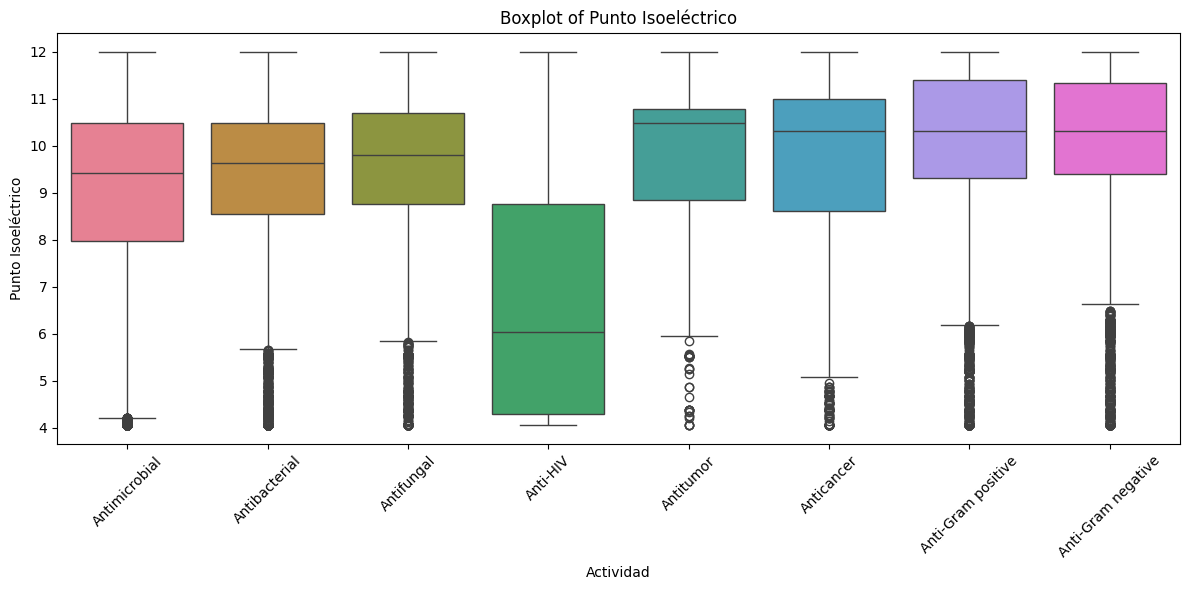

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unir ambos DataFrames por la columna de secuencia
df_combined = pd.merge(df, dfCTDD, on='Secuencia')

# Convertir a formato largo para facilitar la creación del gráfico
df_long = pd.melt(df_combined, id_vars=['Antimicrobial', 'Antibacterial', 'Antifungal', 'Anti-HIV', 'Antitumor', 'Anticancer', 'Anti-Gram positive', 'Anti-Gram negative'],
                   value_vars=['Longitud', 'Hidrofobicidad', 'Polaridad', 'Índice de Boman', 'Carga'],
                   var_name='Characteristic', value_name='Value')

# Crear un DataFrame adicional para transformar las actividades en formato largo
df_activities_long = pd.melt(df_combined, id_vars=['Longitud', 'Hidrofobicidad', 'Polaridad', 'Índice de Boman', 'Carga', 'Punto Isoeléctrico'],
                             value_vars=['Antimicrobial', 'Antibacterial', 'Antifungal', 'Anti-HIV', 'Antitumor', 'Anticancer', 'Anti-Gram positive', 'Anti-Gram negative'],
                             var_name='Activity', value_name='Activity_Value')

# Filtrar solo los valores de interés (donde Activity_Value es 1)
df_activities_long = df_activities_long[df_activities_long['Activity_Value'] == 1]

# Crear gráficos de caja para cada característica física en gráficos separados
characteristics = ['Longitud', 'Hidrofobicidad', 'Polaridad', 'Índice de Boman', 'Carga', 'Punto Isoeléctrico']

# Definir una paleta de colores para las actividades
palette = sns.color_palette("husl", n_colors=len(df_activities_long['Activity'].unique()))

for characteristic in characteristics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Activity', y=characteristic, data=df_activities_long, palette=palette)
    plt.title(f'Boxplot of {characteristic}')
    plt.xlabel('Actividad')
    plt.ylabel(characteristic)
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
    plt.tight_layout()
    plt.show()


#Histograma Aminoacidos

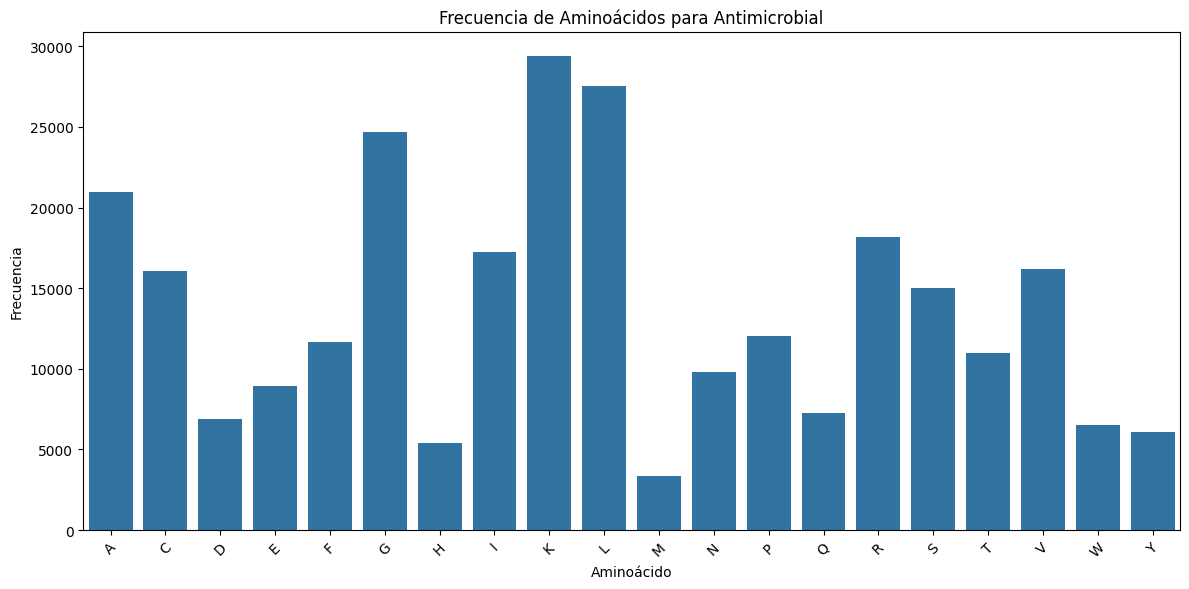

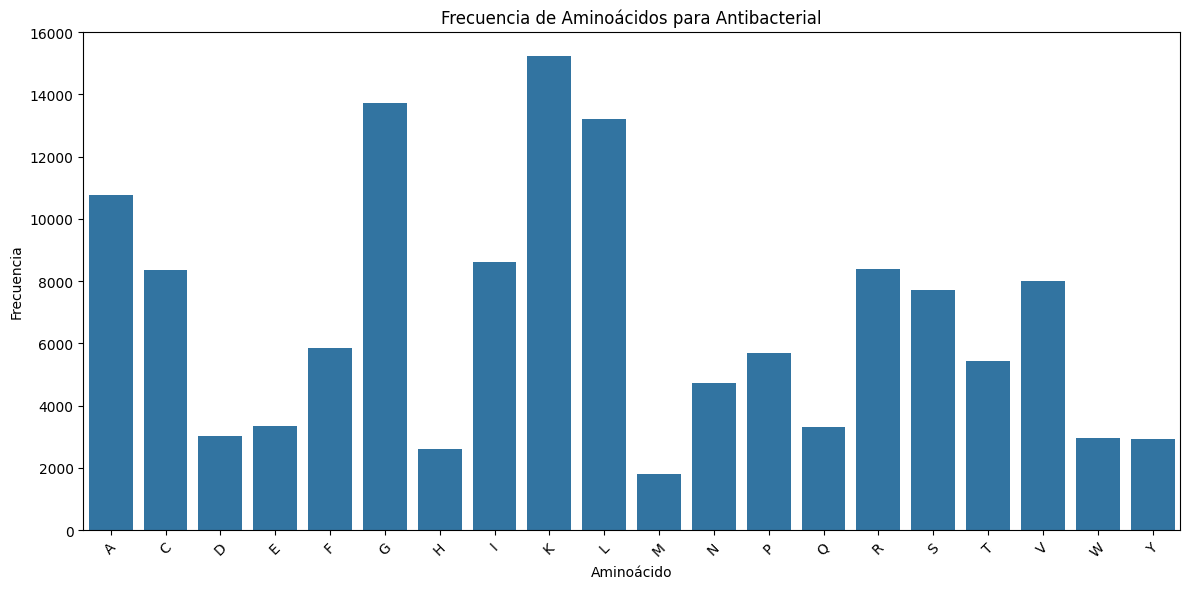

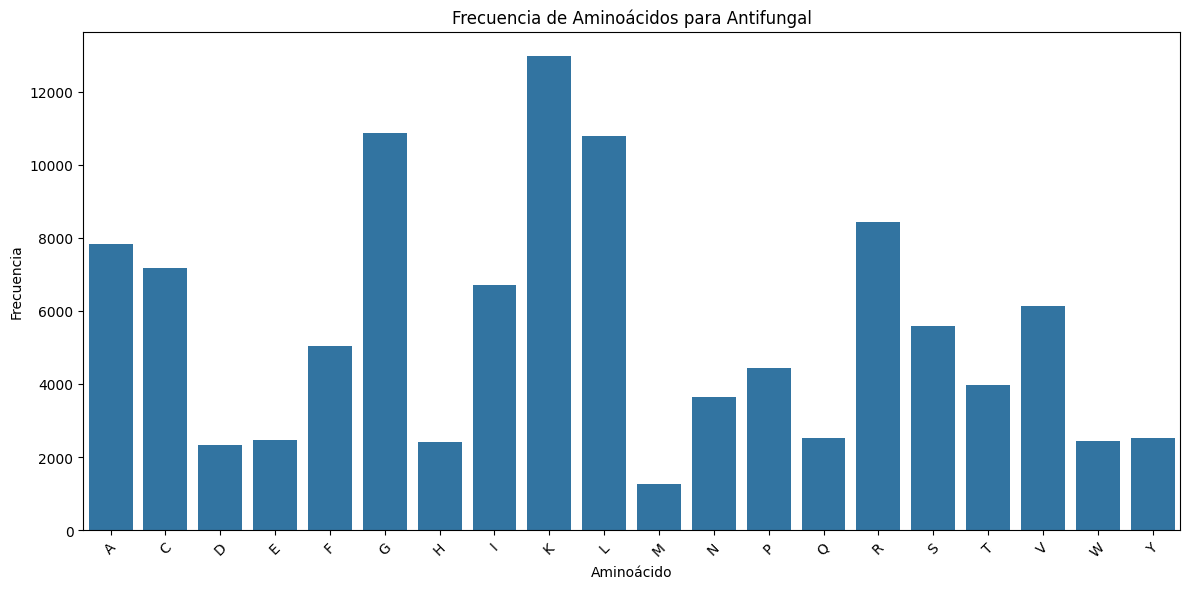

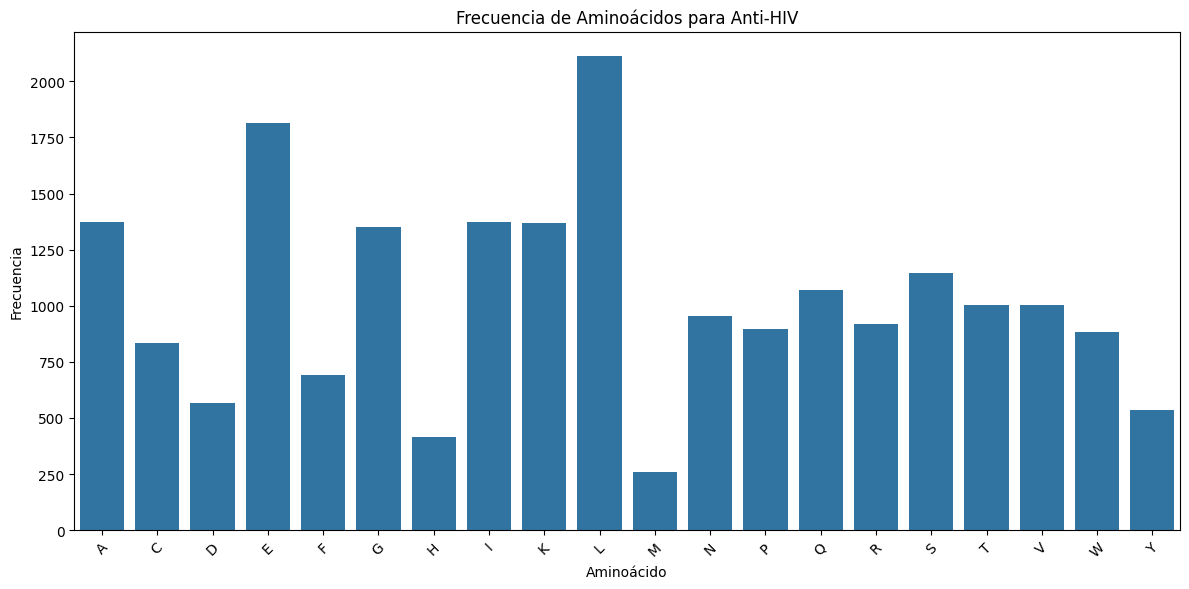

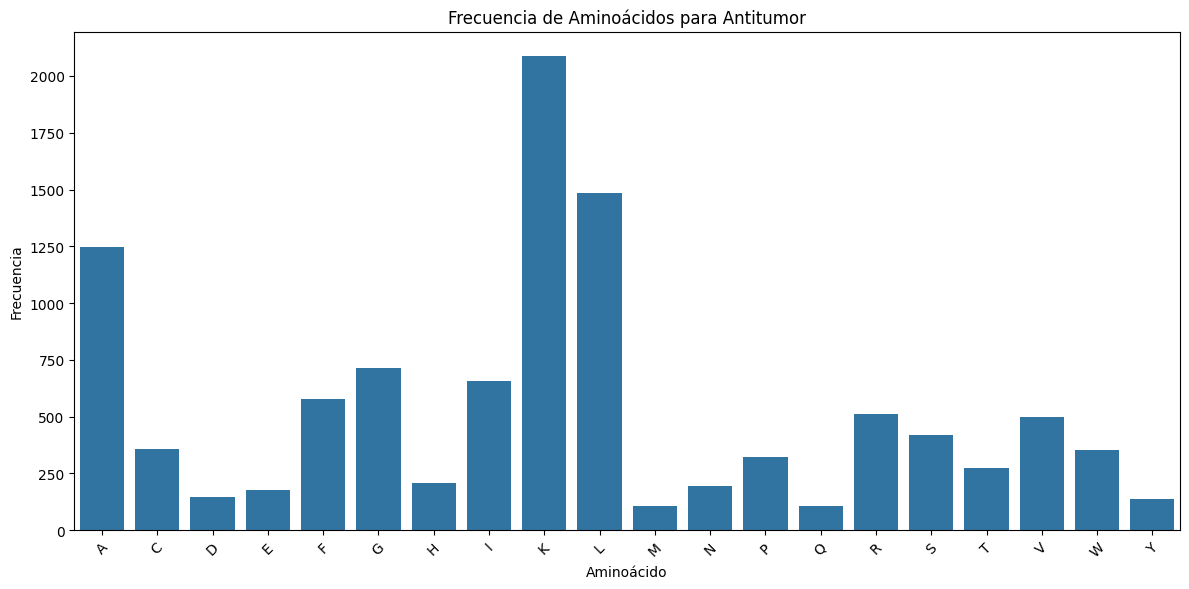

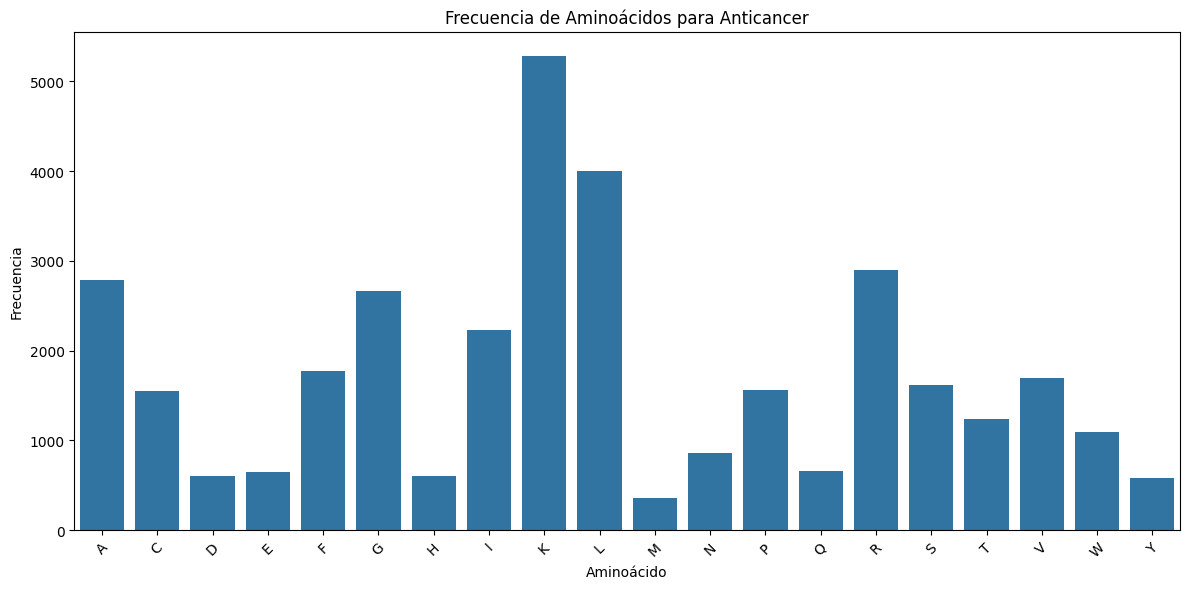

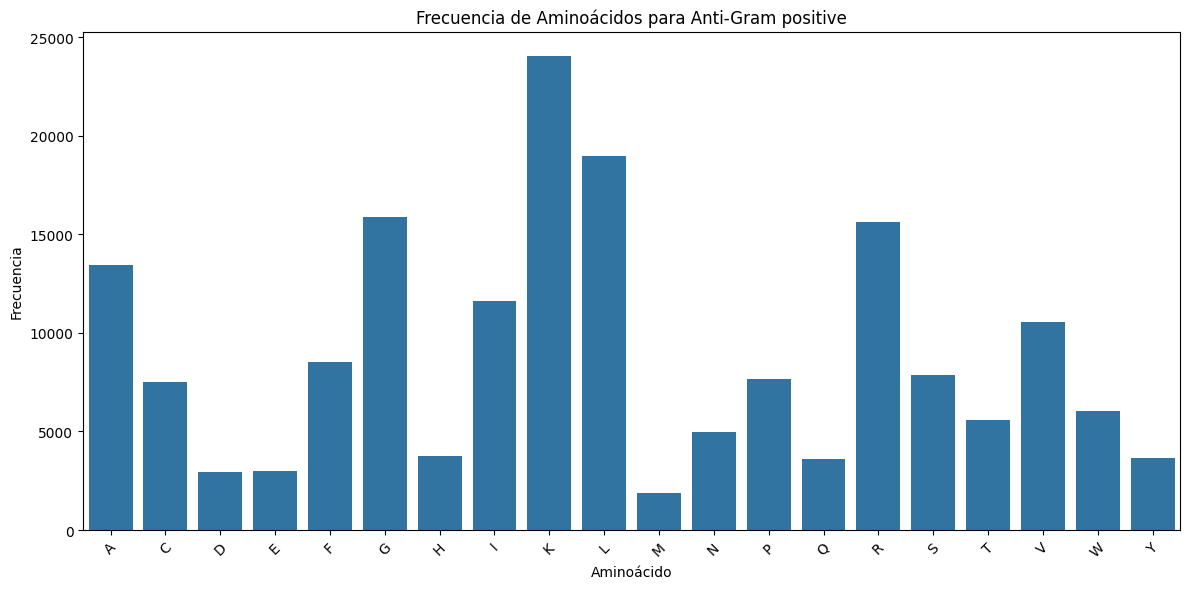

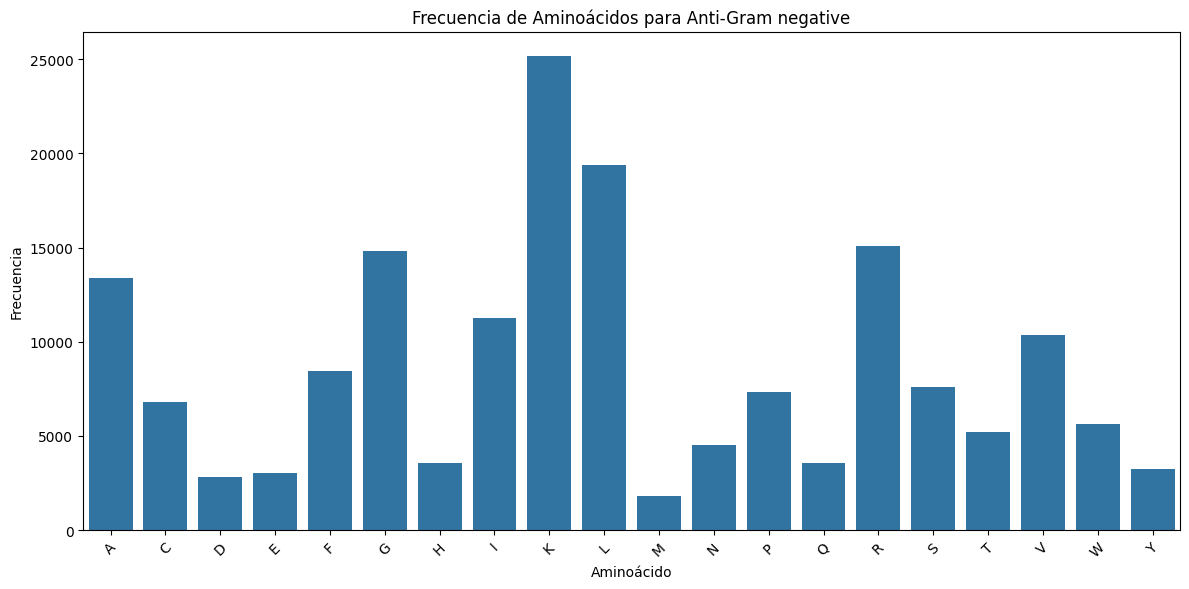

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Filtrar para incluir solo las actividades relevantes
activities = ['Antimicrobial', 'Antibacterial', 'Antifungal', 'Anti-HIV', 'Antitumor', 'Anticancer', 'Anti-Gram positive', 'Anti-Gram negative']

# Función para contar la frecuencia de aminoácidos en una secuencia
def count_amino_acids(sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    counts = Counter(''.join(sequences))
    return [counts.get(aa, 0) for aa in amino_acids]

# Crear histogramas para cada actividad
for activity in activities:
    # Filtrar las secuencias para la actividad actual
    df_activity = df[df[activity] == 1]

    # Obtener todas las secuencias de la actividad
    sequences = df_activity['Secuencia'].tolist()

    # Contar la frecuencia de aminoácidos
    counts = count_amino_acids(sequences)

    # Crear el histograma
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list('ACDEFGHIKLMNPQRSTVWY'), y=counts)
    plt.title(f'Frecuencia de Aminoácidos para {activity}')
    plt.xlabel('Aminoácido')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
    plt.tight_layout()
    plt.show()

En todos los histogramas se evidencia mayor aparación del aminoácido K y L respectivamente, a excepción de Anti VIH en el cuál el aminoácido L cuenta con mayor aparición y K en segundo lugar.

#Matriz de correlacion

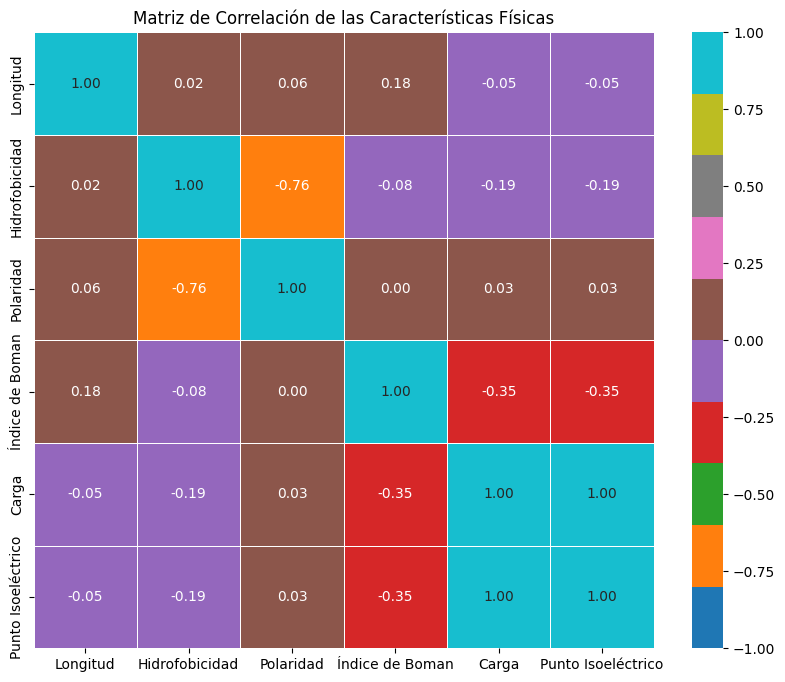

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciono las columnas de características físicas
physical_features = ['Longitud', 'Hidrofobicidad', 'Polaridad', 'Índice de Boman', 'Carga', 'Punto Isoeléctrico']

# Calcular la matriz de correlación
correlation_matrix = df_combined[physical_features].corr()

# Crear un mapa de calor para la matriz de correlación usando una paleta discreta
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='tab10', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las Características Físicas')
plt.show()


In [ ]:
dfCTDD.to_csv('dfCTDD.csv', index=False)